## Project description:
    
In this project, We will analyse local and global temperature data and compare the temperature trends where i live to overall global temperature trends.



**Project purpose:**
Our goal will be to create a visualization and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in the closest big city to where i live. To do this, we’ll follow the steps below:

### Project task:

**Extract the data from the database:** 

There's a workspace that is connected to a database. We’ll need to export the temperature data for the world as well as for the closest big city to where i live. We can find a list of cities and countries in the city_list table. To interact with the database, We'll need to write a SQL query.

1. Write a SQL query to extract the city level data. Export to CSV.
2. Write a SQL query to extract the global data. Export to CSV.

**Open up the CSV using pyton:**

1. Create a line chart that compares Dhaka city’s temperatures with the global temperatures. Make sure to plot the moving average rather than the yearly averages in order to smooth out the lines, making trends more observable (the last concept in the previous lesson goes over how to do this in a spreadsheet).

2. Make observations about the similarities and differences between the world averages and your city’s averages, as well as overall trends. Here are some questions to get you started.

**Is my city hotter or cooler on average compared to the global average? Has the difference been consistent over time?**

**“How do the changes in my city’s temperatures over time compare to the changes in the global average?”**

**What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?**


## Step 1. Extract the data

Using the SQL Workspace in udacity integration platform ,data have been extracted from the temperatures database and then downloaded the results to a CSV using following commands.

SELECT*

FROM global_data

SELECT*

FROM city_data

WHERE city='Dhaka'

SELECT*

FROM city_list

## Step 2. Open the data file and study the general information.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
#Dhaka avgerage temp over the year
bd_df = pd.read_csv('bd.csv')

# column name change of bd_df
bd_df.columns=['year','city','country','dhaka_avg_temp']
display(bd_df.head())

#Berlin avgerage temp over the year
ger_df = pd.read_csv('ger.csv')

# column name change of ger_df
ger_df.columns=['year','city','country','berlin_avg_temp']
display(ger_df.head())

#global avgerage temp over the year
global_df = pd.read_csv('global.csv')
# column name change of global_df
global_df.columns=['year','global_avg_temp']
display(global_df.head())

display(bd_df.info())
display(bd_df.isnull().sum())
bd_df1 = bd_df.dropna()
display(bd_df1.isnull().sum())

display(ger_df.info())
display(ger_df.isnull().sum())
ger_df1 = ger_df.dropna()
display(ger_df1.isnull().sum())


display(global_df.info())
display(global_df.isnull().sum())


,year,city,country,dhaka_avg_temp
0,1796,Dhaka,Bangladesh,25.35
1,1797,Dhaka,Bangladesh,26.36
2,1798,Dhaka,Bangladesh,25.22
3,1799,Dhaka,Bangladesh,25.61
4,1800,Dhaka,Bangladesh,25.54


,year,city,country,berlin_avg_temp
0,1743,Berlin,Germany,6.33
1,1744,Berlin,Germany,10.36
2,1745,Berlin,Germany,1.43
3,1746,Berlin,Germany,NaN
4,1747,Berlin,Germany,NaN


,year,global_avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            218 non-null    int64  
 1   city            218 non-null    object 
 2   country         218 non-null    object 
 3   dhaka_avg_temp  213 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ KB


None

year              0
city              0
country           0
dhaka_avg_temp    5
dtype: int64

year              0
city              0
country           0
dhaka_avg_temp    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             271 non-null    int64  
 1   city             271 non-null    object 
 2   country          271 non-null    object 
 3   berlin_avg_temp  267 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.6+ KB


None

year               0
city               0
country            0
berlin_avg_temp    4
dtype: int64

year               0
city               0
country            0
berlin_avg_temp    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             266 non-null    int64  
 1   global_avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


None

year               0
global_avg_temp    0
dtype: int64

* Conclusion:
    
In the beginning, the datasets have been opened and the general information have been analyzed .The bd_df data set has 218 rows, 4 columns.The ger_df data set has 271 rows, 4 columns Missing values are in the berlin_avg_temp column. The global_df data set has 266 rows, 2 columns and no missing values observed.

## Step 3. Data preprocessing

In [3]:
data_frames = [bd_df1,ger_df1, global_df]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['year'],
                                            how='outer'), data_frames).fillna(0)
display(df_merged.head())
df_merged_1=df_merged.query('city_x=="Dhaka" | country_x=="Bangladesh" | city_y=="Berlin" | country_y=="Germany" ')


display(df_merged.head())
display(df_merged_1.head())


#checking duplicates in dataframe
print('duplicate rows:',df_merged_1.duplicated().sum())

#moving_average

df_merged_1['MA_yearly_dhaka_temp'] = df_merged_1.iloc[:,3].rolling(window=10).mean()
df_merged_1['MA_yearly_berlin_temp'] = df_merged_1.iloc[:,6].rolling(window=10).mean()
df_merged_1['MA_yearly_global_temp'] = df_merged_1.iloc[:,7].rolling(window=10).mean()
display(df_merged_1.head())

,year,city_x,country_x,dhaka_avg_temp,city_y,country_y,berlin_avg_temp,global_avg_temp
0,1796,Dhaka,Bangladesh,25.35,Berlin,Germany,9.01,8.27
1,1797,Dhaka,Bangladesh,26.36,Berlin,Germany,10.07,8.51
2,1798,Dhaka,Bangladesh,25.22,Berlin,Germany,9.33,8.67
3,1799,Dhaka,Bangladesh,25.61,Berlin,Germany,6.72,8.51
4,1800,Dhaka,Bangladesh,25.54,Berlin,Germany,8.60,8.48


,year,city_x,country_x,dhaka_avg_temp,city_y,country_y,berlin_avg_temp,global_avg_temp
0,1796,Dhaka,Bangladesh,25.35,Berlin,Germany,9.01,8.27
1,1797,Dhaka,Bangladesh,26.36,Berlin,Germany,10.07,8.51
2,1798,Dhaka,Bangladesh,25.22,Berlin,Germany,9.33,8.67
3,1799,Dhaka,Bangladesh,25.61,Berlin,Germany,6.72,8.51
4,1800,Dhaka,Bangladesh,25.54,Berlin,Germany,8.60,8.48


,year,city_x,country_x,dhaka_avg_temp,city_y,country_y,berlin_avg_temp,global_avg_temp
0,1796,Dhaka,Bangladesh,25.35,Berlin,Germany,9.01,8.27
1,1797,Dhaka,Bangladesh,26.36,Berlin,Germany,10.07,8.51
2,1798,Dhaka,Bangladesh,25.22,Berlin,Germany,9.33,8.67
3,1799,Dhaka,Bangladesh,25.61,Berlin,Germany,6.72,8.51
4,1800,Dhaka,Bangladesh,25.54,Berlin,Germany,8.60,8.48


duplicate rows: 0


<ipython-input-3-3cbbb0286326>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_1['MA_yearly_dhaka_temp'] = df_merged_1.iloc[:,3].rolling(window=10).mean()
<ipython-input-3-3cbbb0286326>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_1['MA_yearly_berlin_temp'] = df_merged_1.iloc[:,6].rolling(window=10).mean()
<ipython-input-3-3cbbb0286326>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,year,city_x,country_x,dhaka_avg_temp,city_y,country_y,berlin_avg_temp,global_avg_temp,MA_yearly_dhaka_temp,MA_yearly_berlin_temp,MA_yearly_global_temp
0,1796,Dhaka,Bangladesh,25.35,Berlin,Germany,9.01,8.27,NaN,NaN,NaN
1,1797,Dhaka,Bangladesh,26.36,Berlin,Germany,10.07,8.51,NaN,NaN,NaN
2,1798,Dhaka,Bangladesh,25.22,Berlin,Germany,9.33,8.67,NaN,NaN,NaN
3,1799,Dhaka,Bangladesh,25.61,Berlin,Germany,6.72,8.51,NaN,NaN,NaN
4,1800,Dhaka,Bangladesh,25.54,Berlin,Germany,8.60,8.48,NaN,NaN,NaN


* Conclusion

Using reduce merge method bd_df,global_df and ger_df dataframes are merged and some missing data have filtered.After that yearly moving temperature both for dhaka and global have been calculated using default rolling function in python.

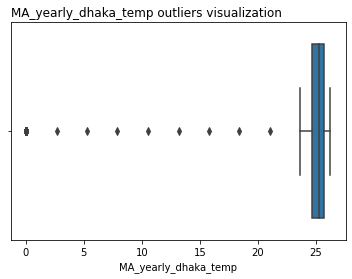

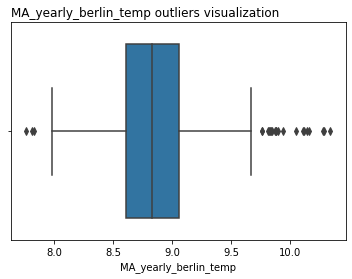

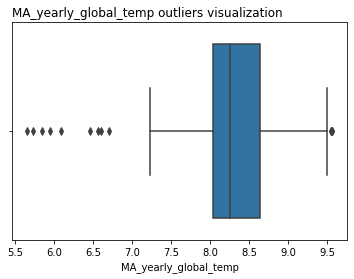

In [4]:
#checking outliers
sns.boxplot(x=df_merged_1['MA_yearly_dhaka_temp'])
plt.title('MA_yearly_dhaka_temp outliers visualization',loc='left')
plt.show()

sns.boxplot(x=df_merged_1['MA_yearly_berlin_temp'])
plt.title('MA_yearly_berlin_temp outliers visualization',loc='left')
plt.show()

sns.boxplot(x=df_merged_1['MA_yearly_global_temp'])
plt.title('MA_yearly_global_temp outliers visualization',loc='left')
plt.show()

9.533249999999994
7.133250000000002


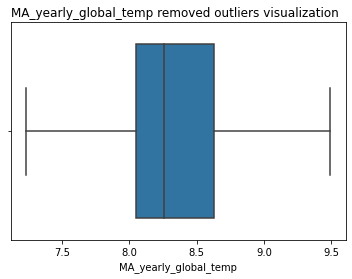

In [5]:
#Removing outliers MA_yearly_global_temp
uw_1 =(df_merged_1['MA_yearly_global_temp'].quantile(0.75))+(1.5*((df_merged_1['MA_yearly_global_temp'].quantile(0.75))-(df_merged_1['MA_yearly_global_temp'].quantile(0.25))))
lw_1=(df_merged_1['MA_yearly_global_temp'].quantile(0.25))-(1.5*((df_merged_1['MA_yearly_global_temp'].quantile(0.75))-(df_merged_1['MA_yearly_global_temp'].quantile(0.25))))
print(uw_1)
print(lw_1)
df_merged_1_filtered = df_merged_1.query(' @lw_1 <= MA_yearly_global_temp <= @uw_1 ')

sns.boxplot(x=df_merged_1_filtered['MA_yearly_global_temp'])
plt.title('MA_yearly_global_temp removed outliers visualization',loc='left')
plt.show()

27.04750000000012
23.435499999999927


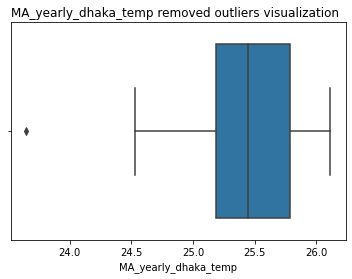

In [6]:
#Removing outliers MA_yearly_dhaka_temp
uw_2 =(df_merged_1_filtered['MA_yearly_dhaka_temp'].quantile(0.75))+(1.5*((df_merged_1_filtered['MA_yearly_dhaka_temp'].quantile(0.75))-(df_merged_1_filtered['MA_yearly_dhaka_temp'].quantile(0.25))))
lw_2=(df_merged_1_filtered['MA_yearly_dhaka_temp'].quantile(0.25))-(1.5*((df_merged_1_filtered['MA_yearly_dhaka_temp'].quantile(0.75))-(df_merged_1_filtered['MA_yearly_dhaka_temp'].quantile(0.25))))
print(uw_2)
print(lw_2)
df_merged_2_filtered = df_merged_1_filtered.query(' @lw_2 <= MA_yearly_dhaka_temp <= @uw_2 ')

sns.boxplot(x=df_merged_2_filtered ['MA_yearly_dhaka_temp'])
plt.title('MA_yearly_dhaka_temp removed outliers visualization',loc='left')
plt.show()

9.761000000000006
7.944999999999998


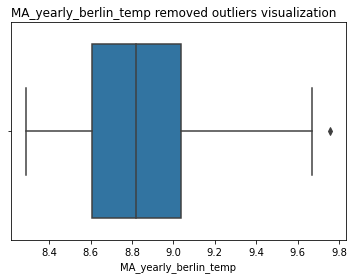

In [7]:
#Removing outliers MA_yearly_berlin_temp
uw_3 =(df_merged_2_filtered ['MA_yearly_berlin_temp'].quantile(0.75))+(1.5*((df_merged_2_filtered ['MA_yearly_berlin_temp'].quantile(0.75))-(df_merged_2_filtered ['MA_yearly_berlin_temp'].quantile(0.25))))
lw_3=(df_merged_2_filtered ['MA_yearly_berlin_temp'].quantile(0.25))-(1.5*((df_merged_2_filtered ['MA_yearly_berlin_temp'].quantile(0.75))-(df_merged_2_filtered ['MA_yearly_berlin_temp'].quantile(0.25))))
print(uw_3)
print(lw_3)
df_merged_3_filtered = df_merged_2_filtered.query(' @lw_3 <= MA_yearly_berlin_temp <= @uw_3 ')

sns.boxplot(x=df_merged_3_filtered ['MA_yearly_berlin_temp'])
plt.title('MA_yearly_berlin_temp removed outliers visualization',loc='left')
plt.show()

* Conclusion

Outliers in the MA_yearly_dhaka_temp,MA_yearly_global_temp and MA_yearly_berlin_temp columns have been cheked in the df_merged_1 dataframe and outliers have been removed using 1.5*IQR rule.

## Step 4. Crete a line chart

,year,city_x,country_x,dhaka_avg_temp,city_y,country_y,berlin_avg_temp,global_avg_temp,MA_yearly_dhaka_temp,MA_yearly_berlin_temp,MA_yearly_global_temp
9,1805,Dhaka,Bangladesh,25.64,Berlin,Germany,7.20,8.56,25.662,8.600,8.551
10,1806,Dhaka,Bangladesh,25.56,Berlin,Germany,9.67,8.43,25.683,8.666,8.567
11,1807,Dhaka,Bangladesh,25.15,Berlin,Germany,9.42,8.28,25.562,8.601,8.544
12,1813,Dhaka,Bangladesh,24.90,Berlin,Germany,8.66,7.74,25.530,8.534,8.451
13,1814,Dhaka,Bangladesh,24.51,Berlin,Germany,7.46,7.59,25.420,8.608,8.359


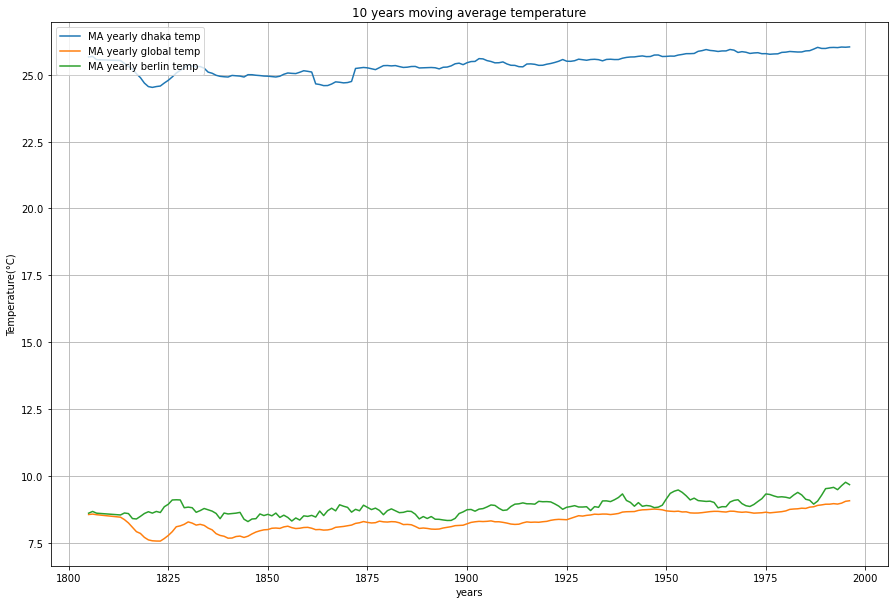

In [8]:
# moving average yearly plot dhaka and global
df_merged_3_filtered=df_merged_3_filtered.set_index('year')
display(df_merged_2_filtered.head())
plt.figure(figsize=[15,10])
plt.grid(True)

plt.plot(df_merged_3_filtered['MA_yearly_dhaka_temp'],label='MA yearly dhaka temp')
plt.plot(df_merged_3_filtered['MA_yearly_global_temp'],label='MA yearly global temp')
plt.plot(df_merged_3_filtered['MA_yearly_berlin_temp'],label='MA yearly berlin temp')
plt.title('10 years moving average temperature')
plt.xlabel("years")
plt.ylabel("Temperature(°C)")
plt.legend(loc=2)

plt.show()

,dhaka_avg_temp,berlin_avg_temp,global_avg_temp,MA_yearly_dhaka_temp,MA_yearly_berlin_temp,MA_yearly_global_temp
count,187.000000,187.000000,187.00000,187.000000,187.000000,187.000000
mean,25.404064,8.856310,8.33262,25.397610,8.833176,8.321171
std,0.584303,0.810941,0.43290,0.385995,0.304480,0.343754
min,20.490000,6.520000,6.94000,24.525000,8.287000,7.557000
25%,25.155000,8.340000,8.09000,25.137000,8.605500,8.070000
50%,25.440000,8.910000,8.35000,25.404000,8.820000,8.278000
75%,25.760000,9.385000,8.64000,25.699000,9.036500,8.636500
max,26.530000,10.720000,9.35000,26.039000,9.758000,9.066000


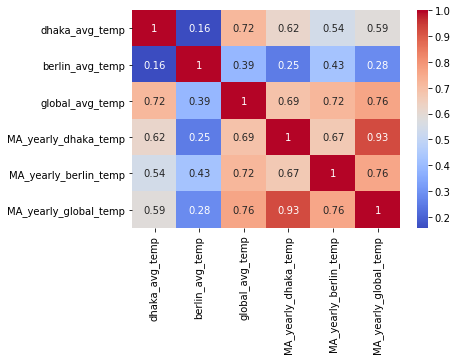

In [9]:
# correlation calculation

display(df_merged_3_filtered.describe())

sns.heatmap(df_merged_3_filtered.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
plt.show()

* Conclusion

Dark red means positive. The stronger the color, the larger the correlation magnitude.Average temperate of dhaka is highly correlated with average temperature global which is 0.72.


## Step 5. Observation

Question 1: Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?

* Dhaka city is way more hotter comparing to global average.And this difference is consistant over time.

Question 2: How do the changes in your city’s temperatures over time compare to the changes in the global average?

* Dhaka city's moving average yearly temperature fluctuate from 24.5°C to 26.5°C. And global temperature 7.4°C to 9.5°C.

Question 3: What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

* Overall, Dhaka city and global  showed increasing temperature trend over the time.The world getting hotter.After 1950, world is getting hotter quickly.The trend is not consistant over the last few hundred years.Between 1800-1850, a temperate drop was obseved for both global and dhaka city.But berlin temperature fluctuate a lot and trend is no consistant.But overall berlin temperature is going up after 1900 century. Also berlin average temperature is 8.9°C and 25.5°C and 8.4°C for dhaka and global average temperature respectively.

* There is positive co-relation observed among the city's. Dhaka city temperature is highly correlated to global temperature rather than Berlin.